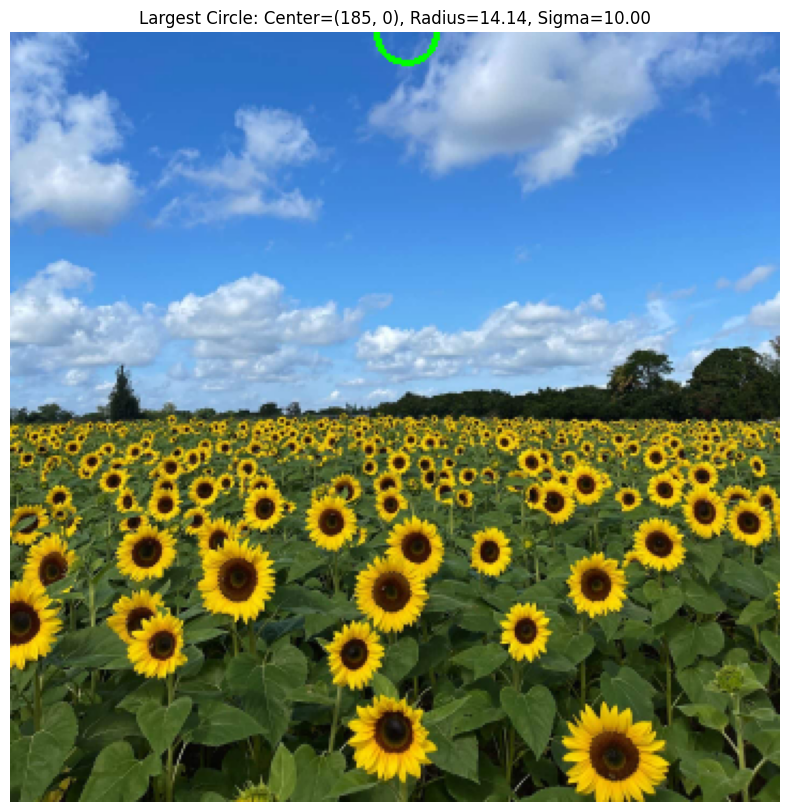

Largest Circle Parameters:
Center: (185, 0)
Radius: 14.14
Range of σ values used: from 1 to 10


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Function to apply Laplacian of Gaussian and detect circles
def detect_circles(image, min_sigma=1, max_sigma=10, num_scales=10):
    circles = []
    height, width = image.shape
    for sigma in np.linspace(min_sigma, max_sigma, num_scales):
        # Create a Gaussian kernel with the given sigma
        blur = cv.GaussianBlur(image, (0, 0), sigma)
        
        # Compute the Laplacian of Gaussian (LoG)
        laplacian = cv.Laplacian(blur, cv.CV_64F)
        
        # Find local maxima (extracted blobs)
        _, max_val, _, max_loc = cv.minMaxLoc(laplacian)
        
        # Check if we found a maximum and store it
        if max_val > 0:
            circles.append({
                'center': max_loc,
                'radius': sigma * np.sqrt(2),
                'sigma': sigma
            })
    
    return circles

# Detect circles in the image
circles = detect_circles(gray, min_sigma=1, max_sigma=10, num_scales=10)

# Find the largest circle
largest_circle = max(circles, key=lambda x: x['radius'])

# Plot the image and draw the largest circle
output_image = im.copy()
cv.circle(output_image, largest_circle['center'], int(largest_circle['radius']), (0, 255, 0), 2)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title(f"Largest Circle: Center={largest_circle['center']}, Radius={largest_circle['radius']:.2f}, Sigma={largest_circle['sigma']:.2f}")
plt.axis('off')
plt.show()

# Report the parameters of the largest circle
print("Largest Circle Parameters:")
print(f"Center: {largest_circle['center']}")
print(f"Radius: {largest_circle['radius']:.2f}")
print(f"Range of σ values used: from 1 to 10")
